In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# ingest the data
data_set = pd.read_csv('airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"])

# add the column moy (i.e., month of year) to use later on to compute the seasonal component
data_set['moy'] = data_set["Month"].dt.month 

# set the index
data_set.set_index("Month")

,Thousands of Passengers,moy
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1960-08-01,606,8
1960-09-01,508,9
1960-10-01,461,10


In [23]:
# compute the centred moving average and the moving average
data_set['centred-MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=True).mean()
data_set['MA'] = data_set['Thousands of Passengers'].rolling(window=12, center=False).mean()

<AxesSubplot:>

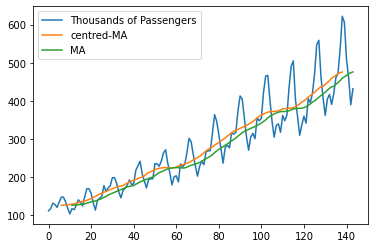

In [27]:
# visualize the original data and the two moving averages
data_set[["Thousands of Passengers","centred-MA","MA"]].plot()

In [28]:
data_set['detrended'] = data_set['Thousands of Passengers']-data_set['centred-MA']

<AxesSubplot:>

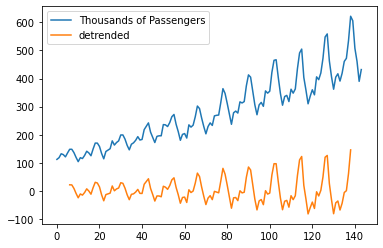

In [31]:
data_set[["Thousands of Passengers","detrended"]].plot()

<AxesSubplot:xlabel='moy'>

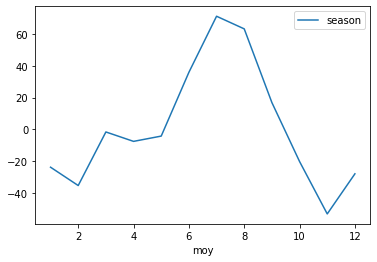

In [76]:
season = data_set[["detrended","moy"]].groupby(["moy"]).mean()
season.rename(columns={"detrended": "season"},inplace=True)
season.plot()

In [88]:
season.mean()

season        1.139257
adj_season   -8.860743
dtype: float64

In [91]:
season["season"]=season["season"]-season.mean()

In [84]:
seasonal_component = season
for i in range(0,12):
    seasonal_component = pd.concat([seasonal_component,season])
seasonal_component = seasonal_component.reset_index()

<AxesSubplot:>

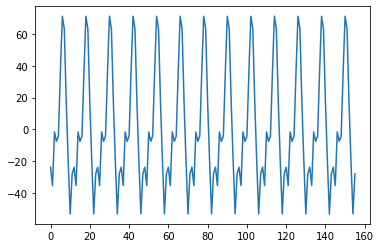

In [81]:
seasonal_component["season"].plot()

In [12]:
from statsmodels.tsa.stattools import adfuller, kpss

df = data_set['detrended'].dropna()

# ADF Test
# where the null hypothesis is the time series possesses a unit root and is non-stationary. 
# So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis. )

result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.219821202784966
p-value: 0.0006098038156792091
Critical Values:
   1%, -3.4865346059036564
Critical Values:
   5%, -2.8861509858476264
Critical Values:
   10%, -2.579896092790057


In [14]:
# KPSS Test
# The KPSS test is used to test for trend stationarity. 
# The null hypothesis and the P-Value interpretation is just the opposite of ADH test.
result = kpss(df, regression='c', nlags=None)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.108155
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
